# Homework 10

Use high nonlinear oscillator solution for p=12(-x**11) and decompose into fourier components. Then reconstruct the signal.

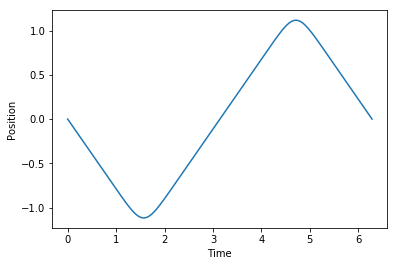

In [20]:
# Let's first try linear force  Fx=-x, then try Fx=, -x**3, -x**5, ..., -x**11

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# rk4.py 4th order Runge Kutta
		 
import matplotlib.pylab as p
import numpy as np

#   Initialization
a = 0.
b = 2*np.pi
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -0.789524
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1] # finish this line                                            
    fReturn[1] = -y[0]**11# finish this line      
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])

p.plot(xp,yp)
p.xlabel('Time')
p.ylabel('Position')
p.show()


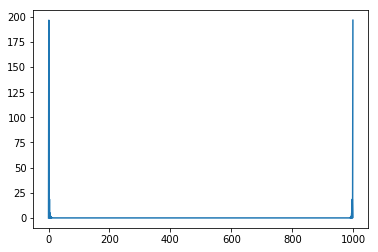

In [21]:
# DFTcomplex.py:  Discrete Fourier Transform with built in complex
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 1000;                  Np = N                           
signal = yp     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = xp   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

def f(signal):                                                  # Signal
    step = twopi/N;        
    x = 0. 
    for i in range(0, N+1):
        signal[i] = yp[i]
        xa[i] = x                      # Plot
        x += step
        
def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += signal[k]*e**(-zexpo)        # finish this line
      dftz[n] = zsum * sq2pi      
      nplot[n] = n
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

f(signal);       
fourier(dftz)              # Call signal, transform

plt.plot(nplot,fplot) 
plt.show()

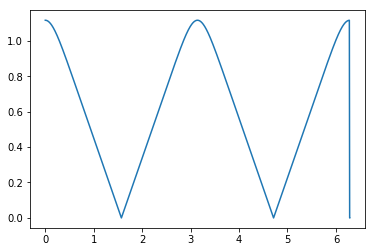

In [28]:
Fplot = zeros( N+2, float ) 

def ifourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += fplot[k]*e**(zexpo)/N        # finish this line
      dftz[n] = zsum/sq2pi      
      nplot[n] = n
      Fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
    
ifourier(dftz)

plt.plot(xp,Fplot)
plt.show()

# I made an attempt at creating an inverse fourier transform above, but it doesn't pan out.